# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (1.5 puntos)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si una paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [3]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

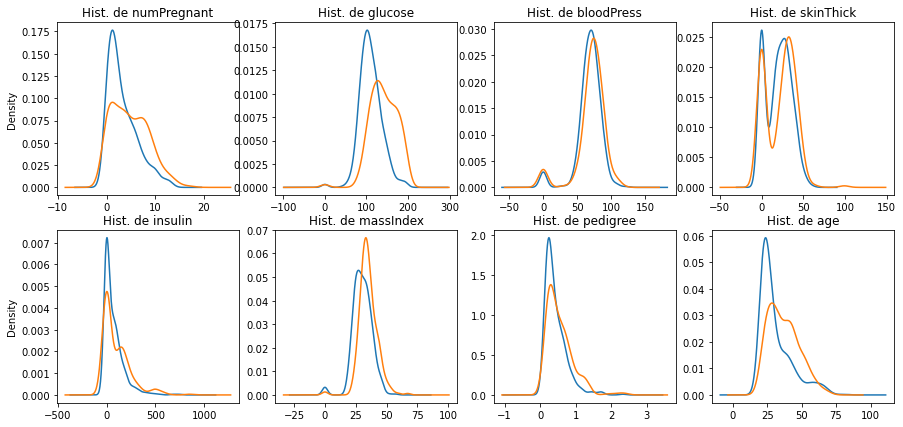

In [5]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

##### Neural network test with 1 layer - 10 to 30 seconds
The number of neurons go from 5 to 50 in steps of 5

In [6]:
max_score = {'mean': 0.0, 'std': 0.0, 'layer_1': 0}

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

for i in range(5, 50, 5):
    clf_nn = MLPClassifier(hidden_layer_sizes=(i,), max_iter=1000, alpha=0)
    scores = cross_val_score(clf_nn, X, y, cv=5)
    if max_score['mean'] < scores.mean():
        max_score['mean'] = scores.mean()
        max_score['std'] = scores.std()
        max_score['layer_1'] = i
print('Max score of the model: {:.2f} +/- {:.2f}, hidden layer neurons {:d}'.format(max_score['mean'], 
                                                                                    max_score['std'], 
                                                                                    max_score['layer_1']))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 10:56:32
Max score of the model: 0.69 +/- 0.02, hidden layer neurons 15
Current Time = 10:56:50


##### Neural network test with 2 layers - 2 to 3 minutes
The number of neurons go from 5 to 50 in steps of 5 in each layer

In [7]:
max_score = {'mean': 0.0, 'std': 0.0, 'layer_1': 0, 'layer_2': 0}

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Starting Time =", current_time)

for i in range(5, 50, 5):
    for n in range(5, 50, 5):
        clf_nn = MLPClassifier(hidden_layer_sizes=(i,n,), max_iter=1000, alpha=0)
        scores = cross_val_score(clf_nn, X, y, cv=5)
        if max_score['mean'] < scores.mean():
            max_score['mean'] = scores.mean()
            max_score['std'] = scores.std()
            max_score['layer_1'] = i
            max_score['layer_2'] = n
print('Max score of the model: {:.2f} +/- {:.2f}, hidden layer neurons ({:d}, {:d})'.format(max_score['mean'], 
                                                                                            max_score['std'], 
                                                                                            max_score['layer_1'], 
                                                                                            max_score['layer_2']))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Ending Time =", current_time)

Starting Time = 10:56:50
Max score of the model: 0.71 +/- 0.02, hidden layer neurons (30, 30)
Ending Time = 10:59:24


##### Neural network test with 3 layers - 25 to 30 minutes
The number of neurons go from 5 to 50 in steps of 5 in each layer

In [ ]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

max_score = {'mean': 0.0, 'std': 0.0, 'layer_1': 0, 'layer_2': 0, 'layer_3': 0}
for i in range(5, 50, 5):
    for n in range(5, 50, 5):
        for k in range(5, 50, 5):
            clf_nn = MLPClassifier(hidden_layer_sizes=(i,n,k), max_iter=1000, alpha=0)
            scores = cross_val_score(clf_nn, X, y, cv=5)
            if max_score['mean'] < scores.mean():
                max_score['mean'] = scores.mean()
                max_score['std'] = scores.std()
                max_score['layer_1'] = i
                max_score['layer_2'] = n
                max_score['layer_3'] = k
print('Max score of the model: {:.2f} +/- {:.2f}, hidden layer neurons ({:d}, {:d}, {:d})'.format(max_score['mean'], 
                                                                                            max_score['std'], 
                                                                                            max_score['layer_1'], 
                                                                                            max_score['layer_2'], 
                                                                                            max_score['layer_3']))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 10:59:24


##### Decision tree test from depth 2 to 99

In [ ]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Starting Time =", current_time)

max_score = {'mean': 0.0, 'std': 0.0, 'max_depth': 0}
for i in range(2, 99):
    clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(clf_dt, X, y, cv=5)
    if max_score['mean'] < scores.mean():
                max_score['mean'] = scores.mean()
                max_score['std'] = scores.std()
                max_score['max_depth'] = i
print("Max score of the model: {:.2f} +/- {:.2f}, max depth applied {:d}".format(max_score['mean'],
                                                                                 max_score['std'],
                                                                                 max_score['max_depth']))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Ending Time =", current_time)

##### KNN test from 3 neighbors to 99 in steps of 2

In [ ]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Starting Time =", current_time)

max_score = {'mean': 0.0, 'std': 0.0, 'neighbors': 0}
for i in range(3, 100, 2):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf_knn, X, y, cv=5)
    if max_score['mean'] < scores.mean():
                max_score['mean'] = scores.mean()
                max_score['std'] = scores.std()
                max_score['neighbors'] = i
print("Score global del modelo: {:.2f} +/- {:.2f}, neighbors set {:d}".format(max_score['mean'],
                                                                                 max_score['std'],
                                                                                 max_score['neighbors']))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Ending Time =", current_time)

## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

## Question 1 - KNN.
The best score that we are able to get with knn is __0.76 +/- 0.04__ with __13 neighbors__.

## Question 2 - Decision Tree.
The best score that we are able to get with a decision tree is __0.74 +/- 0.02__ with a __depth of 3__.

## Question 3 - Neural network. 
Neural networks can be configured in a lot of different ways so we decided to check the score of every configuration having 3 hidden layers, a maximum of 100 neurons per layer and 1000 epochs in each configuration:
* 1 layer. __55 neurons__ gave us a score of __0.72 +/- 0.04__.
* 2 layer. __25, 20 neurons__ gave us a similar score of __0.71 +/- 0.03__.
* 3 layer. __20, 20, 20 neurons__ gave us a similar score of __0.72 +/- 0.03__.

One important thing to say is that if we run the code several times we can see that the result of the neural network is not always the same, although the settings are not changed. 

This is because the neural network weights are set to a random value at the begining of the training, after some epochs the values change. The fact that the vales are random makes that the result is not always going to be the same.